(8950, 16) (8950,)
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64
                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
PRC_FULL_PAYMENT                           0
PAYMENTS                                   0
PURCHASES_TRX                              0
CASH_ADVANCE_TRX                           0
CASH_ADVANCE_FREQUENCY                     0
PURCHASES_INSTALLMENTS_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_FREQUENCY                        0
CASH_ADVANCE                               0
INSTALLMENTS_PURCHASES                     0
ONEOFF_PURCHASES                           0
PURCHASES                                  0
BALANCE_FREQUENCY                          0
BALANCE                                    0
                                  Null Count
Feature               

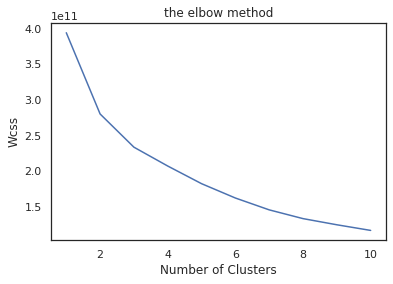

Silhouette Score After PCA:  0.2671095631048621


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
dataset = pd.read_csv('CC.csv')
x= dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
y= dataset.iloc[:,-1]
print(x.shape,y.shape)
print(dataset["TENURE"].value_counts())
from sklearn.cluster import KMeans
nulls = pd.DataFrame(x.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
x = x.select_dtypes(include=[np.number]).interpolate().dropna()
nulls = pd.DataFrame(x.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
from sklearn.cluster import KMeans
nclusters = 3 
km = KMeans(n_clusters=nclusters)
km.fit(x)

y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhoutte Score without scaling: " + str(score))
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)
from sklearn.cluster import KMeans
nclusters = 3 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("Silhoutte Score after scaling: " + str(score))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(x)
x_scaler = scaler.transform(x)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, dataset[['TENURE']]], axis=1)


nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(x_scaler)
y_cluster_kmeans = km.predict(x_scaler)
score = metrics.silhouette_score(x_scaler, y_cluster_kmeans)
print("Silhouette Score After PCA: ", score)